In [1]:
from veritastool.model.modelwrapper import ModelWrapper
from veritastool.model.model_container import ModelContainer
from veritastool.usecases.credit_scoring import CreditScoring

import pickle
import numpy as np

from sklearn.linear_model import LogisticRegression

In [2]:
#Load Credit Scoring Test Data
# NOTE: Assume current working directory is the root folder of the cloned veritastool repository
file = "./veritastool/examples/data/credit_score_dict.pickle"
input_file = open(file, "rb")
cs = pickle.load(input_file)

#Model Contariner Parameters
y_true = np.array(cs["y_test"])
y_pred = np.array(cs["y_pred"])
y_train = np.array(cs["y_train"])
p_grp = {'SEX': [1], 'MARRIAGE':[1]}
up_grp = {'SEX': [2], 'MARRIAGE':[2]}
x_train = cs["X_train"]
x_test = cs["X_test"]
model_name = "credit_scoring"
model_type = "classification"
y_prob = cs["y_prob"]
model_obj = LogisticRegression(C=0.1, max_iter=1000)
model_obj.fit(x_train, y_train) #fit the model as required for transparency analysis

#Create Model Container 
container = ModelContainer(y_true, p_grp, model_type, model_name, y_pred, y_prob, y_train, x_train=x_train, \
                           x_test=x_test, model_object=model_obj, up_grp=up_grp)

#Create Use Case Object
cre_sco_obj= CreditScoring(model_params = [container], fair_threshold = 80, fair_concern = "eligible", \
                           fair_priority = "benefit", fair_impact = "normal", perf_metric_name="accuracy", \
                           tran_row_num = [20,40], tran_max_sample = 1000, tran_pdp_feature = ['LIMIT_BAL'], tran_max_display = 10)
                                                     

Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator Pipeline from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [3]:
cre_sco_obj.evaluate()

Evaluate performance:   0%|          


Class Distribution
	pos_label                                                          77.880%
	neg_label                                                          22.120%


Performance Metrics
	Selection Rate                                             0.781 +/- 0.008
	Accuracy                                                   0.784 +/- 0.009
	Balanced Accuracy                                          0.685 +/- 0.012
	Recall                                                     0.863 +/- 0.007
	Precision                                                  0.860 +/- 0.009
	F1 Score                                                   0.861 +/- 0.006
	True Negative Rate                                         0.506 +/- 0.023
	False Negative Rate                                        0.137 +/- 0.007
	Negative Predictive Value                                  0.512 +/- 0.019
	ROC AUC Score                                              0.726 +/- 0.017
	Log-loss                                     

In [4]:
cre_sco_obj.evaluate(visualize = True)

In [5]:
cre_sco_obj.tradeoff()

Tradeoff:   0%|          


-------------------------------- 1. SEX --------------------------------
Performance versus Fairness Trade-Off
	 Single Threshold
		Privileged/Unprivileged Threshold                 0.446
		Best balanced_acc*                                0.674
	 Separated Thresholds
		Privileged Threshold                              0.431
		Unprivileged Threshold                            0.422
		Best balanced_acc*                                0.688
	 Separated Thresholds under Neutral Fairness (0.001)
		Privileged Threshold                              0.413
		Unprivileged Threshold                            0.443
		Best balanced_acc*                                0.684
		*estimated by approximation, subject to the resolution of mesh grid

----------------------------- 2. MARRIAGE  -----------------------------
Performance versus Fairness Trade-Off
	 Single Threshold
		Privileged/Unprivileged Threshold                 0.446
		Best balanced_acc*                                0.674
	 Separated

In [6]:
cre_sco_obj.feature_importance()

Feature importance:   0%|          




--------------------------------------------------1: Fairness on Marriage---------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------
|Removed Protected Variable    |accuracy                 |equal_opportunity        |Fairness Conclusion |Suggestion        |
----------------------------------------------------------------------------------------------------------------------------
|MARRIAGE                      |-0.005                   |0.063                    |fair to fair (+)    |Examine Further   |
----------------------------------------------------------------------------------------------------------------------------
|SEX                           |-0.005                   |0.063                    |fair to fair (+)    |Examine Further   |
-------------------------------------------------------------------------------------------------------------------------

Correlation analysis :   0%|          

Permutation explainer: 1003it [00:10,  5.12it/s]                                                                                                                         



Partial correlation matrix (Most correlated features for MARRIAGE, SEX):


,MARRIAGE,SEX,AGE,PAY_2,EDUCATION,LIMIT_BAL
MARRIAGE,1.000000,0.043743,0.450591,0.034411,0.159621,0.090286
SEX,0.043743,1.000000,0.123246,0.131354,0.022870,0.113064
AGE,0.450591,0.123246,1.000000,0.139253,0.227760,0.344717
PAY_2,0.034411,0.131354,0.139253,1.000000,0.169153,0.346423
EDUCATION,0.159621,0.022870,0.227760,0.169153,1.000000,0.213266
LIMIT_BAL,0.090286,0.113064,0.344717,0.346423,0.213266,1.000000


* No surrogate detected based on correlation analysis (threshold=0.7).


In [7]:
cre_sco_obj.root_cause()

Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/mas-veritas-review/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/9p/zqv8rk793ts9cxxfr66p40sh0000gn/T/ipykernel_31469/1983512896.py", line 1, in <module>
AttributeError: 'CreditScoring' object has no attribute 'root_cause'


In [8]:
mitigated = cre_sco_obj.mitigate(p_var=[], method=['reweigh', 'correlation', 'threshold'])

Bias mitigation :   0%|          


*Effective input for p_var = ['MARRIAGE', 'SEX']

                                Threshold tuning                                

--------------------------------------------------------------------------------
|Protected variable            |Privileged             |Unprivileged           |
--------------------------------------------------------------------------------
|MARRIAGE                      |0.414                  |0.449                  |
--------------------------------------------------------------------------------
|SEX                           |0.413                  |0.443                  |
--------------------------------------------------------------------------------


                                   Reweighing                                   

--------------------------------------------------------------------------------
|MARRIAGE, SEX                 |Label                  |Weight                 |
------------------------------------------------------

Running transparency for model 1        done      


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


     Interpretability                   done      
     Partial dependence                 done      


Computing Permutation Importance:   0%|          

     Permutation importance             done      


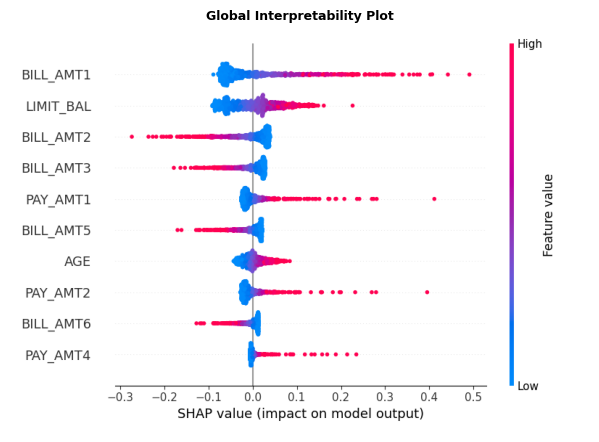

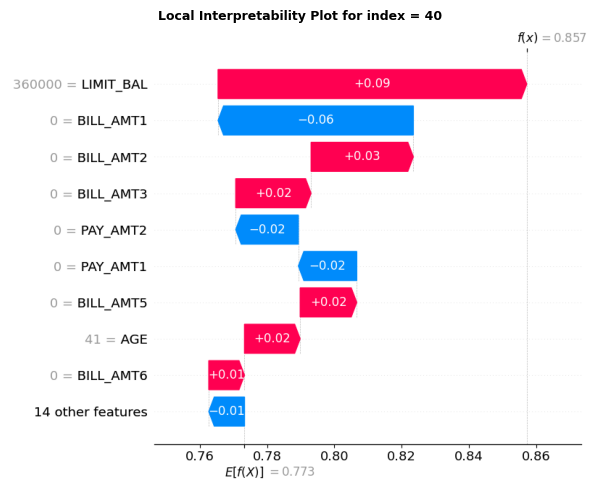

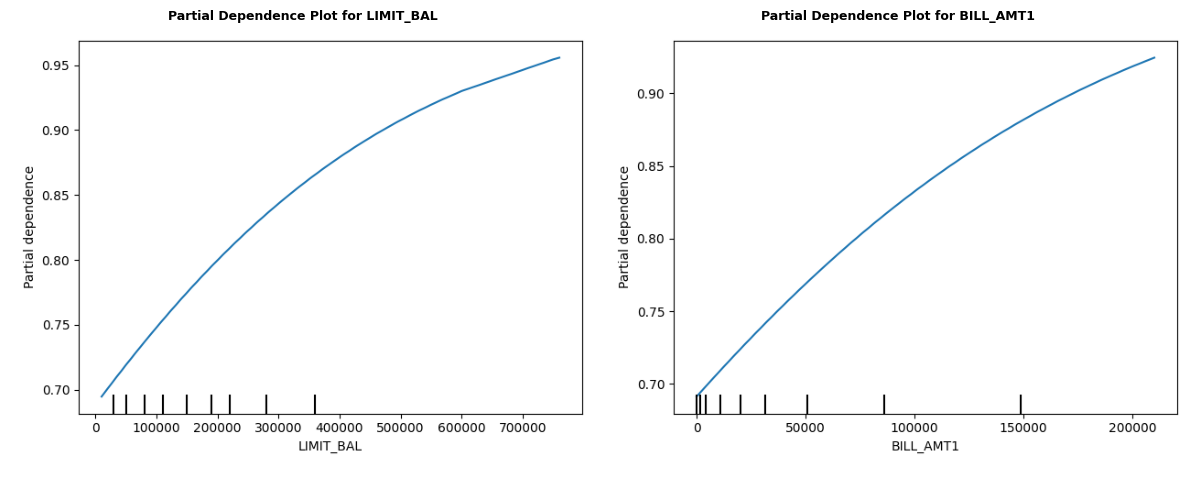

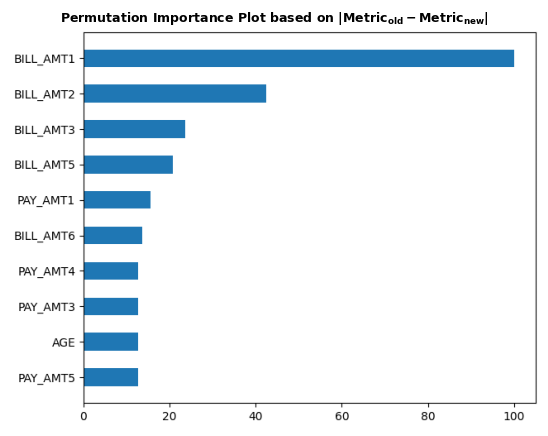

In [9]:
#run the entire transparency analysis
cre_sco_obj.explain()

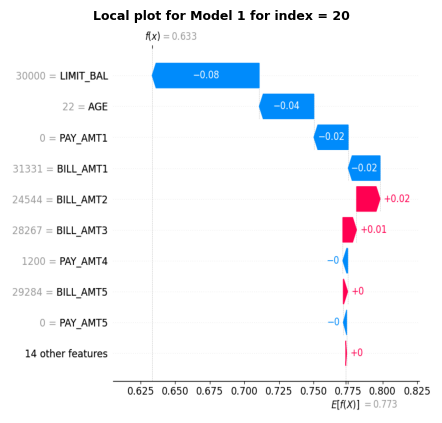

In [10]:
#get the local interpretability plot for specific row index and model
cre_sco_obj.explain(local_row_num = 20)

In [11]:
cre_sco_obj.compile()

Running evaluate                        done      
     performance measures               done      
     bias detection                     done      
     probability calibration            done      
     performance dynamics               done      
     individual fairness                done      
Running tradeoff                        done      
Running feature importance              done      
     leave-one-out analysis             done      
     correlation analysis               done      
Running transparency for model 1        done      
Generating model artifact               done
Saved model artifact to model_artifact_credit_scoring_20230417_2219.json
